# KSHELL calculations of the $^{29}F \rightarrow ^{29}Ne$ beta decay

We performed a series of calculations using kshell to investigate the role of $\hbar\omega$ excitations in the decay strength to the first excited state.

SDPF-M value calculated with no limit on $\hbar\omega$ but no proton excitations in the $f_{7/2}p_{3/2}$.

SDPF-M' does have a restriction to $4\hbar\omega$

Notes on modified interactions:

- Prime modifier (`'`) $\rightarrow$ $\nu p_{3/2}$ - 0.5 MeV
- `p32low` and '$p_{32}-$' $\rightarrow$ $\nu p_{3/2}$ - 0.75 MeV
- `f72low` and '$f_{72}-$' $\rightarrow \nu f_{7/2}$ - 0.5 MeV

All calculations are stored in the ACF under

`~/lustre/calculations/IslandOfInversion/F29/`

The decay scheme looks like this:

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Coding Projects/E19044 F29/Project.toml`
  [b2723bf5] + BetaDecayUtils v1.0.0
    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Coding Projects/E19044 F29/Manifest.toml`
  [b2723bf5] + BetaDecayUtils v1.0.0


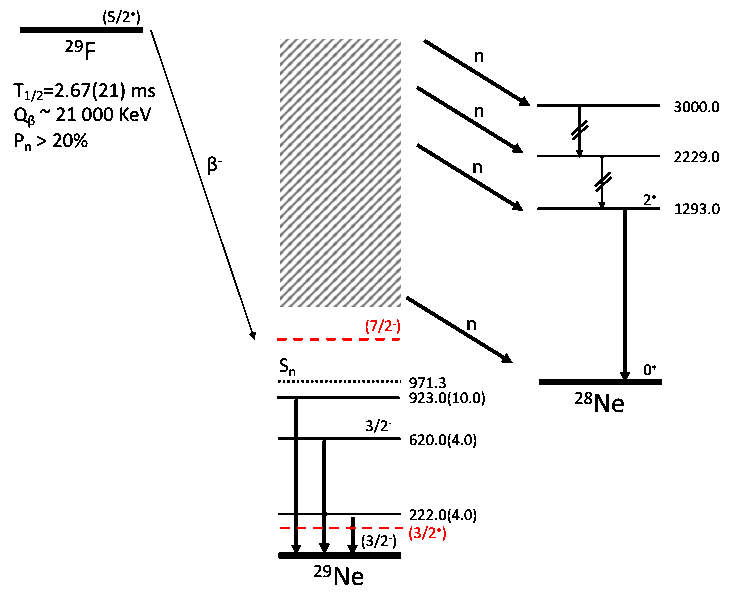

In [1]:
# include("/Users/mmadurga/Library/Mobile Documents/com~apple~CloudDocs/Coding Projects/Utilities/Julia/bDecayUtil.jl")
# using Pkg; Pkg.add("BetaDecayUtils")
 using Plots,Images,PrettyTables,BetaDecayUtils

levels=load("./images/level-scheme.gif")



We define a handy function to calculate log(ft) from the BGT strength from shell model

In [2]:

expbgt=logftfromib(9,3e-3,21.800,0.174,0.052)
expbgtup = logftfromib(9,3e-3,21.800,0.174,0.052-0.017)
expbgtdown = logftfromib(9,3e-3,21.800,0.174,0.052+0.017)

print("exp bgt: ",round(expbgt; digits=2),"⁺",round(expbgtup-expbgt;digits=2),"₋",round(expbgt-expbgtdown; digits=2))

exp bgt: 5.68⁺0.17₋0.12

## BGT ($5/2^+ \rightarrow 3/2^+$)

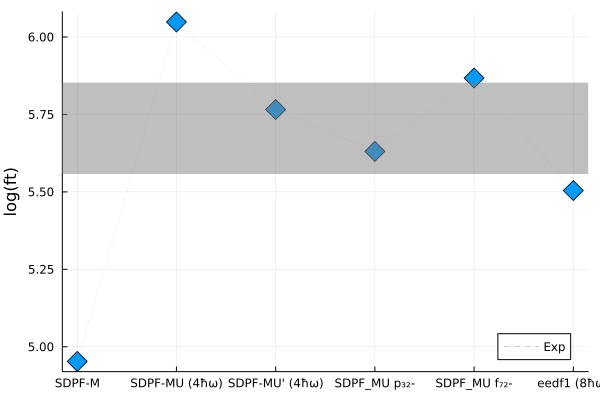

In [34]:
# sdpfmbgt5p3p = 0.0701 ; lftsdpfm5p3p = logftfrombgt(sdpfmbgt5p3p) #old calculation at 4ħω
sdpfmbgt5p3p = 0.0748 ; lftsdpfm5p3p = logftfrombgt(sdpfmbgt5p3p) 
sdpfmubgt5p3p = 0.006 ; lftsdpfmu5p3p = logftfrombgt(sdpfmubgt5p3p)
sdpfmprime5p3p =0.0638 ;  lftsdpfmprime5p3p = logftfrombgt(sdpfmprime5p3p)
sdpfmuprimebgt5p3p = 0.0115 ; lftsdpfmuprime5p3p = logftfrombgt(sdpfmuprimebgt5p3p)
sdpfmup32lowbgt5p3p = 0.0157 ; lftsdpfmup32low5p3p = logftfrombgt(sdpfmup32lowbgt5p3p)
sdpfmuf72lowbgt5p3p = 0.0091 ; lftsdpfmuf72low5p3p = logftfrombgt(sdpfmuf72lowbgt5p3p)
eedf1 = 0.021 ; lfteedf1 = logftfrombgt(eedf1)

plot(["SDPF-M",#="SDPF-M'",=#"SDPF-MU (4ħω)","SDPF-MU' (4ħω)","SDPF_MU p₃₂-","SDPF_MU f₇₂-","eedf1 (8ħω)"],
[lftsdpfm5p3p,#=lftsdpfmprime5p3p,=#lftsdpfmu5p3p,lftsdpfmuprime5p3p,lftsdpfmup32low5p3p,lftsdpfmuf72low5p3p,lfteedf1],
line=false,marker=:diamond,markersize=10,label="",ylabel="log(ft)")
hline!([expbgt],linestyle=:dash,linecolor=:black,label="Exp",ribbon=(expbgt-expbgtdown,expbgtup-expbgt),line=false,fillcolor=:grey)

In [32]:
pretty_table(["log(ft)";;
lftsdpfm5p3p;;lftsdpfmprime5p3p;;lftsdpfmu5p3p;;lftsdpfmuprime5p3p;;#=lftsdpfmup32low5p3p;;lftsdpfmuf72low5p3p=#lfteedf1;;round(expbgt;digits=2)],
header=["","SDPF-M","SDPF-M'","SDPF-MU","SDPF-MU'",#="SDPF-MU p₃₂-","SDPF-MU f₇₂-"=#"eedf1","exp"])

┌─────────┬─────────┬─────────┬─────────┬──────────┬─────────┬──────┐
│         │  SDPF-M │ SDPF-M' │ SDPF-MU │ SDPF-MU' │   eedf1 │  exp │
├─────────┼─────────┼─────────┼─────────┼──────────┼─────────┼──────┤
│ log(ft) │ 4.95267 │ 5.02175 │ 6.04842 │  5.76588 │ 5.50435 │ 5.68 │
└─────────┴─────────┴─────────┴─────────┴──────────┴─────────┴──────┘


## Wavefunction composition of the $^{29}F(5/2^+)$



In [6]:
orbitals=["d3/2" "d5/2" "s1/2" "f7/2" "p3/2"]

#             d3/2   d5/3   s1/2   f7/2   p3/2  
sdpfm29f5p=[0.024  0.910  0.060  0.005  0.001    #p
            1.816  5.889  1.941  1.623  0.731]    #n
             
sdpfmprime29f5p = [0.025  0.894  0.074  0.004  0.002
                   1.656  5.881  1.941  1.438  1.084]

sdpfmu29f5p = [0.917  0.018  0.024  0.015  0.017  0.005  0.004
               5.772  2.675  1.892  0.901  0.118  0.562  0.079]

#                      d5/2  d3/2   s1/2   f7/2   f5/2  p3/2    p1/2
 sdpfmuprime29f5p = [0.910  0.020  0.031  0.015  0.016  0.005  0.004
                     5.765  2.510  1.893  0.855  0.116  0.774  0.087]

 sdpfmup32low29f5p = [0.907  0.021  0.035  0.014  0.015  0.005  0.004
                      5.762  2.414  1.894  0.824  0.113  0.901  0.091]

  sdpfmuf72low29f5p = [0.914  0.020  0.026  0.015  0.017  0.004  0.004
                       5.766  2.565  1.887  1.067  0.118  0.523  0.075]

2×7 Matrix{Float64}:
 0.914  0.02   0.026  0.015  0.017  0.004  0.004
 5.766  2.565  1.887  1.067  0.118  0.523  0.075

In [7]:
groupedbar(["SDPF-M","SDPF-M'","SDPF-MU","SDPF-MU'","SDPF-MU p₃₂-","SDPF-MU f₇₂-"],
 permutedims([sdpfm29f5p[2,:];;sdpfmprime29f5p[2,:];;
 [sdpfmu29f5p[2,2];sdpfmu29f5p[2,1];sdpfmu29f5p[2,3:4];sdpfmu29f5p[2,6]];;
 [sdpfmuprime29f5p[2,2];sdpfmuprime29f5p[2,1];sdpfmuprime29f5p[2,3:4];sdpfmuprime29f5p[2,6]];;
 [sdpfmup32low29f5p[2,2];sdpfmup32low29f5p[2,1];sdpfmup32low29f5p[2,3:4];sdpfmup32low29f5p[2,6]];;
 [sdpfmuf72low29f5p[2,2];sdpfmuf72low29f5p[2,1];sdpfmuf72low29f5p[2,3:4];sdpfmuf72low29f5p[2,6]]]),
 labels= orbitals,title="²⁹F(5/2⁺) ν-orbitals occupation"
 )

UndefVarError: UndefVarError: groupedbar not defined

In [8]:
pretty_table([["d3/2","d5/2","s1/2","f7/2","p3/2"];;
sdpfm29f5p[2,:];;sdpfmprime29f5p[2,:];;
[sdpfmu29f5p[2,2];sdpfmu29f5p[2,1];sdpfmu29f5p[2,3:4];sdpfmu29f5p[2,6]];;
 [sdpfmuprime29f5p[2,2];sdpfmuprime29f5p[2,1];sdpfmuprime29f5p[2,3:4];sdpfmuprime29f5p[2,6]];;
 [sdpfmup32low29f5p[2,2];sdpfmup32low29f5p[2,1];sdpfmup32low29f5p[2,3:4];sdpfmup32low29f5p[2,6]];;
 [sdpfmuf72low29f5p[2,2];sdpfmuf72low29f5p[2,1];sdpfmuf72low29f5p[2,3:4];sdpfmuf72low29f5p[2,6]]],
header=["","SDPF-M", "SDPF-M'", "SDPF-MU", "SDPF-MU'", "SDPF-MU p₃₂-","SDPF-MU f₇₂-"])

┌──────┬────────┬─────────┬─────────┬──────────┬──────────────┬──────────────┐
│      │ SDPF-M │ SDPF-M' │ SDPF-MU │ SDPF-MU' │ SDPF-MU p₃₂- │ SDPF-MU f₇₂- │
├──────┼────────┼─────────┼─────────┼──────────┼──────────────┼──────────────┤
│ d3/2 │  1.816 │   1.656 │   2.675 │     2.51 │        2.414 │        2.565 │
│ d5/2 │  5.889 │   5.881 │   5.772 │    5.765 │        5.762 │        5.766 │
│ s1/2 │  1.941 │   1.941 │   1.892 │    1.893 │        1.894 │        1.887 │
│ f7/2 │  1.623 │   1.438 │   0.901 │    0.855 │        0.824 │        1.067 │
│ p3/2 │  0.731 │   1.084 │   0.562 │    0.774 │        0.901 │        0.523 │
└──────┴────────┴─────────┴─────────┴──────────┴──────────────┴──────────────┘


## Fraction of $\hbar\omega$ excitations in $^{29}F$



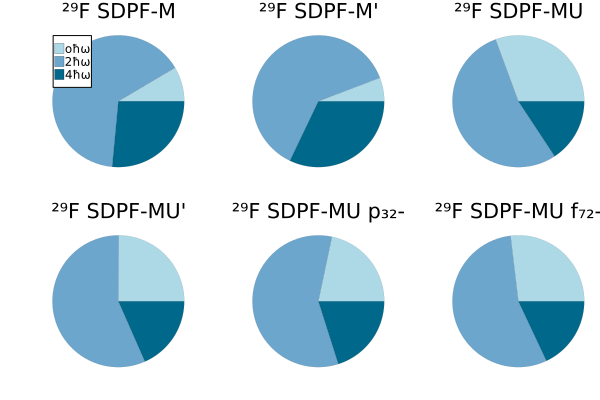

In [9]:
sdpfmhw=[0.085,  0.650, 0.265]
sdpfmprimehw=[0.058, 0.621 ,0.321]
sdpfmuhw=[0.306, 0.536, 0.157]
sdpfmuprimehw=[0.249 ,0.567 ,0.184]
sdpfmup32lowhw=[ 0.217 ,0.582 ,0.201]
sdpfmuf72lowhw=[ 0.269 ,0.551 ,0.180]



plot(pie(["oħω","2ħω","4ħω"], sdpfmhw,title="²⁹F SDPF-M",color=[:lightblue,:skyblue3,:deepskyblue4],line=false,legend=:topleft),
pie(["oħω","2ħω","4ħω"], sdpfmprimehw,title="²⁹F SDPF-M'",color=[:lightblue,:skyblue3,:deepskyblue4],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmuhw,title="²⁹F SDPF-MU",color=[:lightblue,:skyblue3,:deepskyblue4],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmuprimehw,title="²⁹F SDPF-MU'",color=[:lightblue,:skyblue3,:deepskyblue4],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmup32lowhw,title="²⁹F SDPF-MU p₃₂-",color=[:lightblue,:skyblue3,:deepskyblue4],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmuf72lowhw,title="²⁹F SDPF-MU f₇₂-",color=[:lightblue,:skyblue3,:deepskyblue4],line=false,label=false))


In [10]:
pretty_table([["ħω","2ħω","4ħω"];;
sdpfmhw;;sdpfmprimehw;;sdpfmuhw;;sdpfmuprimehw;;sdpfmup32lowhw;;sdpfmuf72lowhw],
header=["","SDPF-M", "SDPF-M'", "SDPF-MU", "SDPF-MU'", "SDPF-MU p₃₂-","SDPF-MU f₇₂-"])


┌─────┬────────┬─────────┬─────────┬──────────┬──────────────┬──────────────┐
│     │ SDPF-M │ SDPF-M' │ SDPF-MU │ SDPF-MU' │ SDPF-MU p₃₂- │ SDPF-MU f₇₂- │
├─────┼────────┼─────────┼─────────┼──────────┼──────────────┼──────────────┤
│  ħω │  0.085 │   0.058 │   0.306 │    0.249 │        0.217 │        0.269 │
│ 2ħω │   0.65 │   0.621 │   0.536 │    0.567 │        0.582 │        0.551 │
│ 4ħω │  0.265 │   0.321 │   0.157 │    0.184 │        0.201 │         0.18 │
└─────┴────────┴─────────┴─────────┴──────────┴──────────────┴──────────────┘


## Fraction of $\hbar\omega$ excitations in $^{29}Ne$ $3/2^+$ state

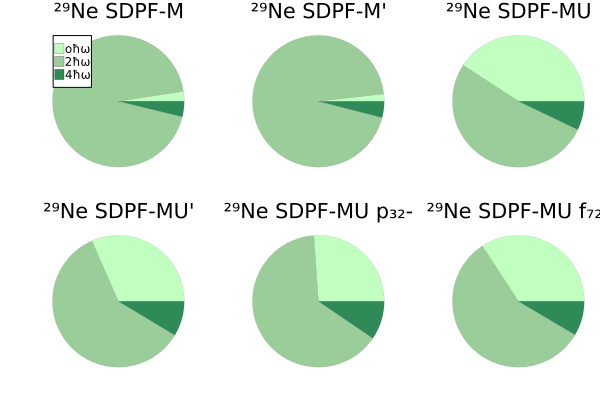

In [11]:
sdpfm29nehw=[ 0.024, 0.937 ,0.038]
sdpfmprime29nehw=[0.018 ,0.942 ,0.040]
sdpfmu29nehw=[0.408 ,0.521 ,0.071]
sdpfmuprime29nehw=[0.316 ,0.598 ,0.086]
sdpfmup32low29nehw=[0.261 ,0.644 ,0.095]
sdpfmuf72low29nehw=[0.342 ,0.573 ,0.085]


plot(pie(["oħω","2ħω","4ħω"], sdpfm29nehw,title="²⁹Ne SDPF-M",color=[:darkseagreen1,:darkseagreen3,:seagreen],line=false,legend=:topleft),
pie(["oħω","2ħω","4ħω"], sdpfmprime29nehw,title="²⁹Ne SDPF-M'",color=[:darkseagreen1,:darkseagreen3,:seagreen],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmu29nehw,title="²⁹Ne SDPF-MU",color=[:darkseagreen1,:darkseagreen3,:seagreen],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmuprime29nehw,title="²⁹Ne SDPF-MU'",color=[:darkseagreen1,:darkseagreen3,:seagreen],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmup32low29nehw,title="²⁹Ne SDPF-MU p₃₂-",color=[:darkseagreen1,:darkseagreen3,:seagreen],line=false,label=false),
pie(["oħω","2ħω","4ħω"], sdpfmuf72low29nehw,title="²⁹Ne SDPF-MU f₇₂-",color=[:darkseagreen1,:darkseagreen3,:seagreen],line=false,label=false))



In [12]:
pretty_table([["ħω","2ħω","4ħω"];;
sdpfm29nehw;;sdpfmprime29nehw;;sdpfmu29nehw;;sdpfmuprime29nehw;;sdpfmup32low29nehw;;sdpfmuf72low29nehw],
header=["","SDPF-M", "SDPF-M'", "SDPF-MU", "SDPF-MU'", "SDPF-MU p₃₂-","SDPF-MU f₇₂-"])

┌─────┬────────┬─────────┬─────────┬──────────┬──────────────┬──────────────┐
│     │ SDPF-M │ SDPF-M' │ SDPF-MU │ SDPF-MU' │ SDPF-MU p₃₂- │ SDPF-MU f₇₂- │
├─────┼────────┼─────────┼─────────┼──────────┼──────────────┼──────────────┤
│  ħω │  0.024 │   0.018 │   0.408 │    0.316 │        0.261 │        0.342 │
│ 2ħω │  0.937 │   0.942 │   0.521 │    0.598 │        0.644 │        0.573 │
│ 4ħω │  0.038 │    0.04 │   0.071 │    0.086 │        0.095 │        0.085 │
└─────┴────────┴─────────┴─────────┴──────────┴──────────────┴──────────────┘


## The ground state of $^{29}Ne$

So far we have investigated the role of the $p_{3/2}$ orbital in driving down the log(ft) for the decay of $^{29}F$. However we can also investigate the fact that the ground state of $^{29}Ne$ is now known to be a $3/2^-$. We plot the energy split of the $3/2^+$ and $3/2^-$ for the different SDPF-MU models we have used.

The first calculation here was done up to $3\hbar\omega$, due to the large computational cost of $5\hbar\omega$

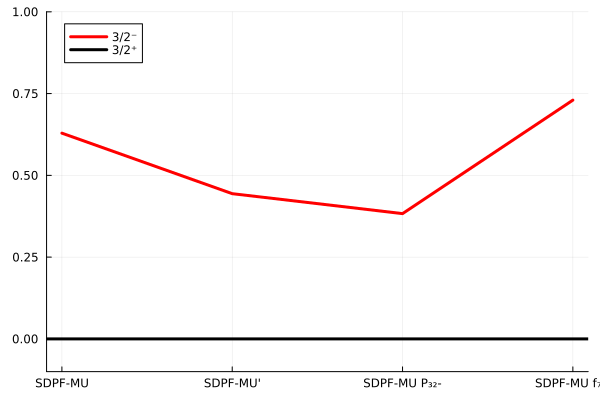

In [13]:
E32minus=[]
sdpfmu32minus = 0.629; push!(E32minus,sdpfmu32minus)
sdpfmuprime32minus = 0.444; push!(E32minus,sdpfmuprime32minus)
sdpfmup32low32minus = 0.383; push!(E32minus,sdpfmup32low32minus)
sdpfmuf72low32minus = 0.730; push!(E32minus,sdpfmuf72low32minus)


plot(["SDPF-MU","SDPF-MU'","SDPF-MU P₃₂-","SDPF-MU f₇₂-"],E32minus,
ylims=(-0.1,1.0),linewidth=3,linecolor=:red,label="3/2⁻")
hline!([0.0],linecolor=:black,linewidth=3,label="3/2⁺")

In [14]:
pretty_table(["E₃₂₋ (MeV)";;permutedims(hcat(E32minus))],
header=["","SDPF-MU","SDPF-MU'","SDPF-MU P₃₂-","SDPF-MU f₇₂-"])

┌────────────┬─────────┬──────────┬──────────────┬──────────────┐
│            │ SDPF-MU │ SDPF-MU' │ SDPF-MU P₃₂- │ SDPF-MU f₇₂- │
├────────────┼─────────┼──────────┼──────────────┼──────────────┤
│ E₃₂₋ (MeV) │   0.629 │    0.444 │        0.383 │         0.73 │
└────────────┴─────────┴──────────┴──────────────┴──────────────┘


### Energy of the $3/2^-$ in $^{29}Ne$ calculated at $5\hbar\omega$

We got the calculations at $5\hbar\omega$ done on campus-beacon-long



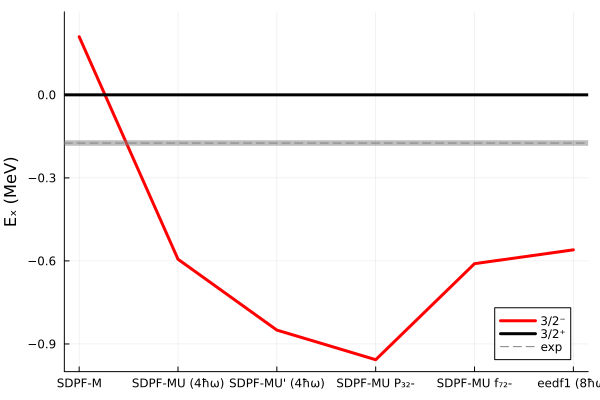

In [33]:
E32minus5hw=[]
sdpfm32minus = 0.210; push!(E32minus5hw,sdpfm32minus)
sdpfmu32minus5hw = -0.594; push!(E32minus5hw,sdpfmu32minus5hw)
sdpfmuprime32minus5hw = -0.850; push!(E32minus5hw,sdpfmuprime32minus5hw)
sdpfmup32low32minus5hw = -0.957; push!(E32minus5hw,sdpfmup32low32minus5hw)
sdpfmuf72low32minus5hw = -0.610; push!(E32minus5hw,sdpfmuf72low32minus5hw)
eedf132minus = -0.560; push!(E32minus5hw,eedf132minus)

plot(["SDPF-M","SDPF-MU (4ħω)","SDPF-MU' (4ħω)","SDPF-MU P₃₂-","SDPF-MU f₇₂-","eedf1 (8ħω)"],E32minus5hw,
ylims=(-1.0,0.3),linewidth=3,linecolor=:red,label="3/2⁻",ylabel="Eₓ (MeV)")
hline!([0.0],linecolor=:black,linewidth=3,label="3/2⁺")
hline!([-0.174],linecolor=:grey,style=:dash,label="exp",ribbon=(0.01,0.01),fillcolor=:grey)


In [16]:
pretty_table(["E₃₂₋ (MeV)";;permutedims(hcat(E32minus5hw))],
header=["","SDPF-MU","SDPF-MU'","SDPF-MU P₃₂-","SDPF-MU f₇₂-"])

┌────────────┬─────────┬──────────┬──────────────┬──────────────┐
│            │ SDPF-MU │ SDPF-MU' │ SDPF-MU P₃₂- │ SDPF-MU f₇₂- │
├────────────┼─────────┼──────────┼──────────────┼──────────────┤
│ E₃₂₋ (MeV) │    0.21 │   -0.594 │        -0.85 │        -0.56 │
└────────────┴─────────┴──────────┴──────────────┴──────────────┘
